# Assignment 4

In [188]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##  bike_day_raw

In [189]:
df = pd.read_csv('bike_day_raw.csv')

In [190]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [192]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [193]:
print("trains_score: ", train_score)
print("test_score: ", test_score)

trains_score:  0.5180365538408678
test_score:  0.5089721505288725


In [194]:
# could also use mean_squared_error function from sklearn.metrics

## diabetes

### Linear Regression

In [195]:
from sklearn.datasets import load_diabetes

In [196]:
diabetes =load_diabetes()
X = diabetes.data
y = diabetes.target

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [198]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [199]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

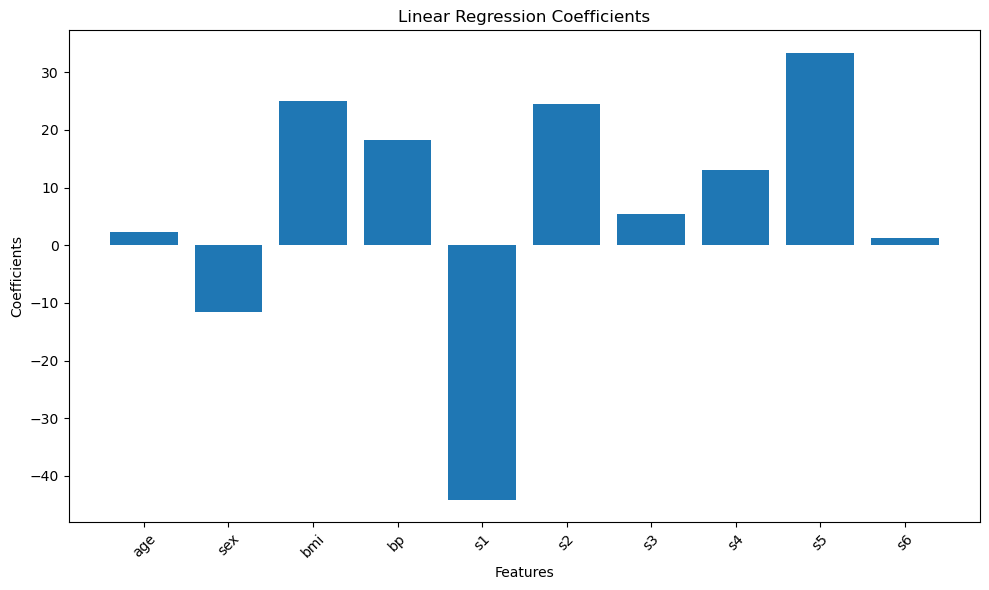

In [200]:
model.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
plt.bar(diabetes.feature_names, model.coef_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.show()

### Ridge

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [202]:
ridge = Ridge()

In [203]:
param_grid = {
    'alpha': np.logspace(-3, 3, 7)
}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid)

In [204]:
grid_search

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [205]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [206]:
best_ridge = grid_search.best_estimator_

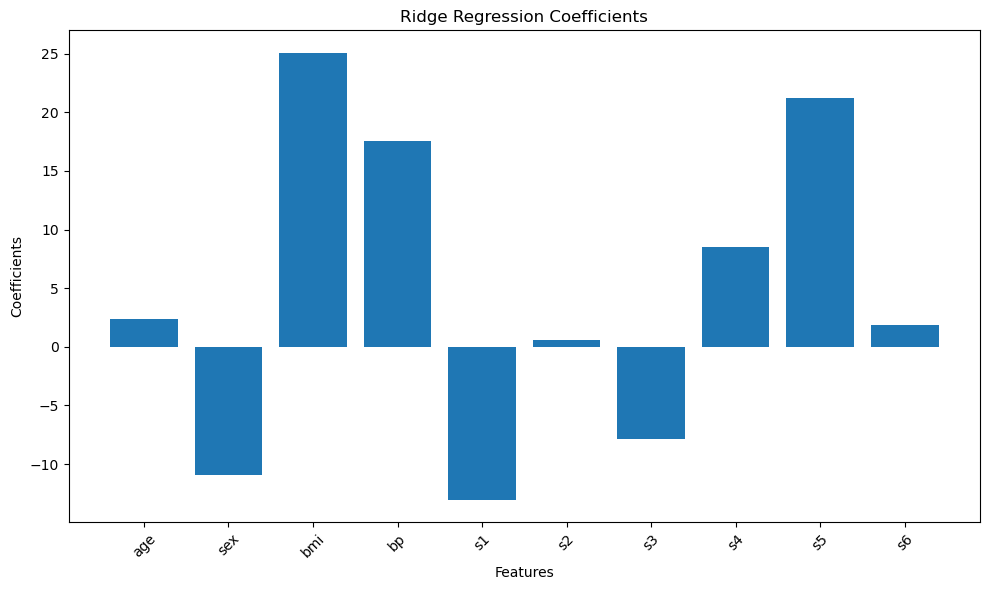

In [215]:
# First fit the model on the scaled data
model.fit(X_train_scaled, y_train)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(diabetes.feature_names, best_ridge.coef_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.tight_layout()
plt.show()

### Lasso

In [208]:
from sklearn.linear_model import Lasso

In [209]:

param_grid = {
    'alpha': np.logspace(-4, 2, 7)
}
lasso = Lasso()

In [210]:
grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid)

In [211]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [212]:
best_lasso = grid_search.best_estimator_

In [213]:
y_pred = best_lasso.predict(X_test_scaled)

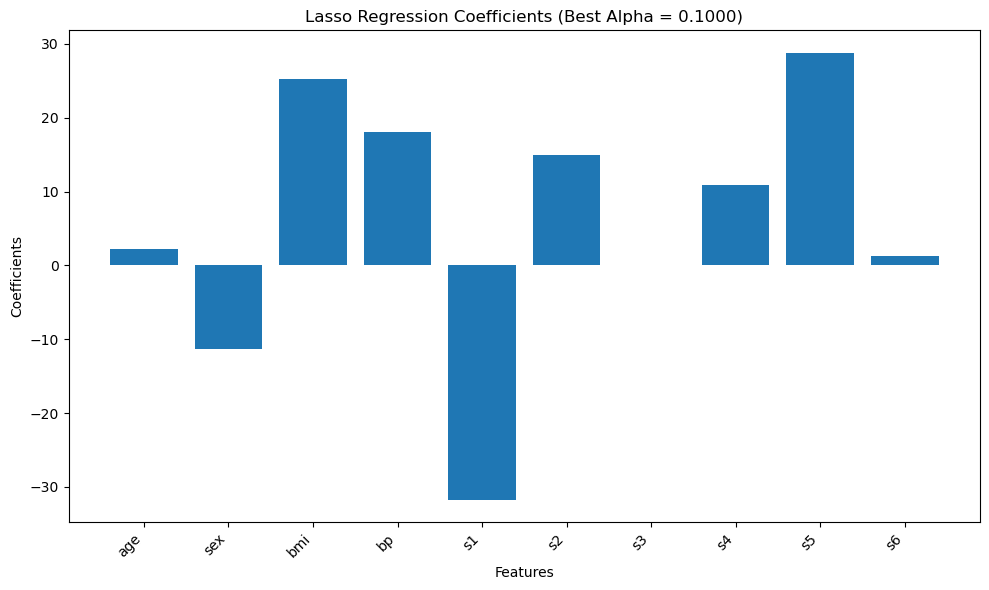

In [214]:
plt.figure(figsize=(10, 6))
plt.bar(diabetes.feature_names, best_lasso.coef_)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title(f'Lasso Regression Coefficients (Best Alpha = {grid_search.best_params_["alpha"]:.4f})')
plt.tight_layout()
plt.show()